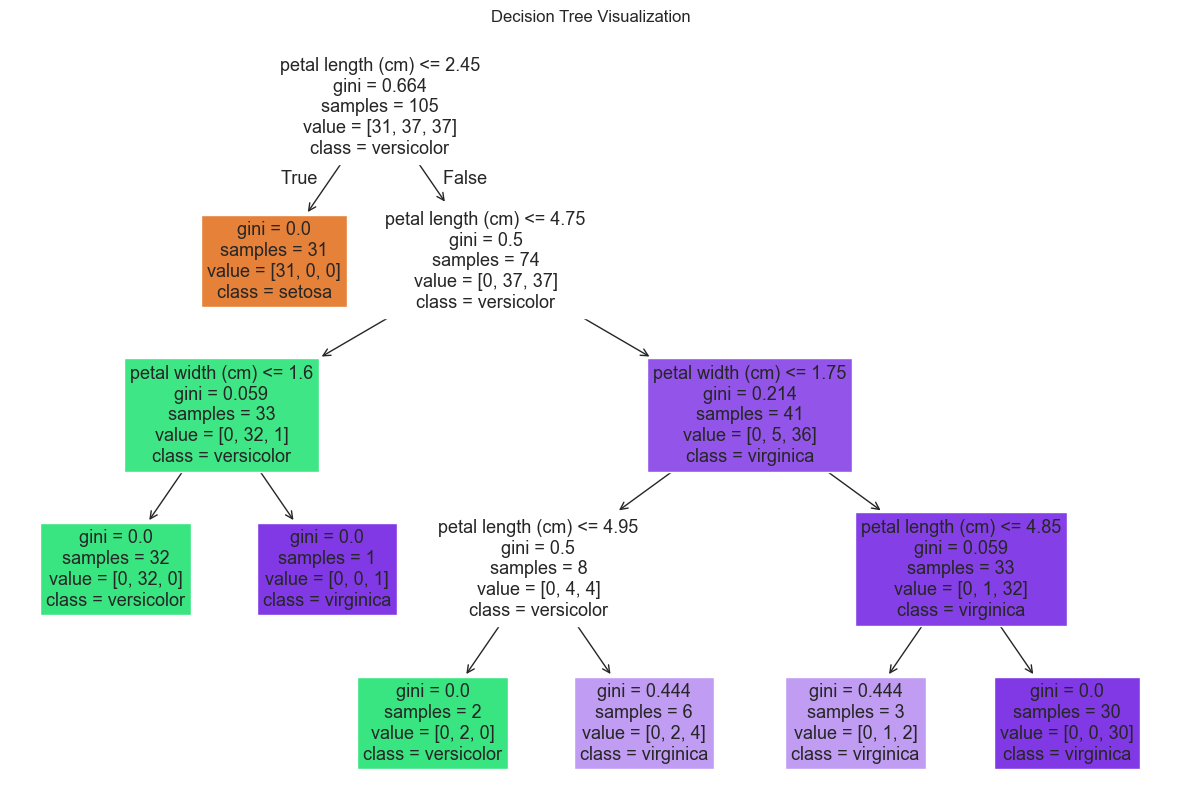

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9428571428571428
Training Accuracy: 0.97
Testing Accuracy: 1.00


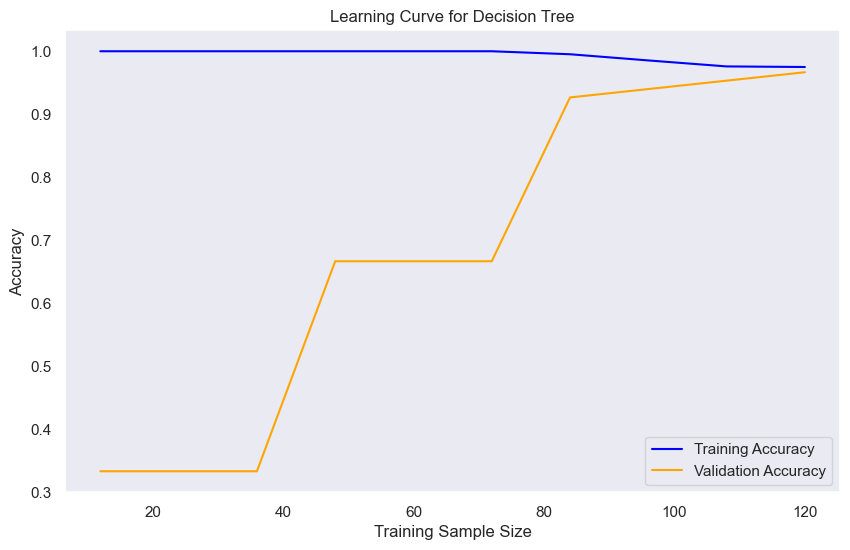

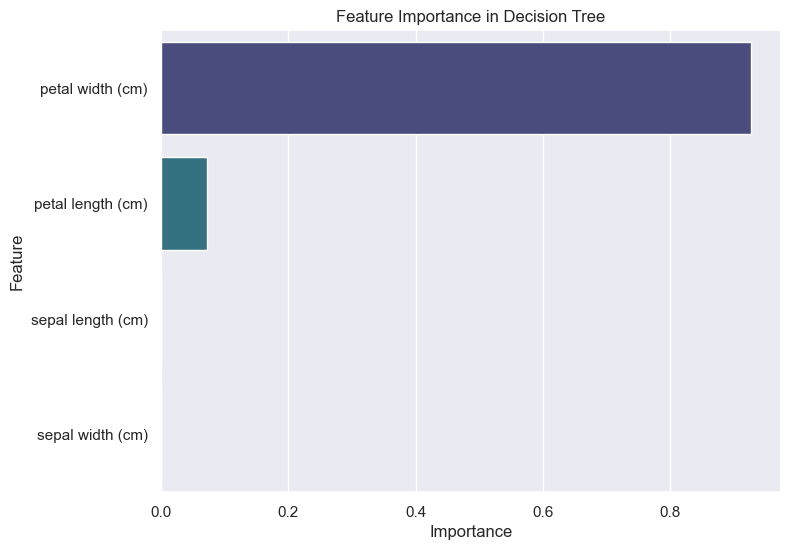

Decision Tree Testing Accuracy: 1.00
Random Forest Testing Accuracy: 1.00
Logistic Regression Testing Accuracy: 1.00


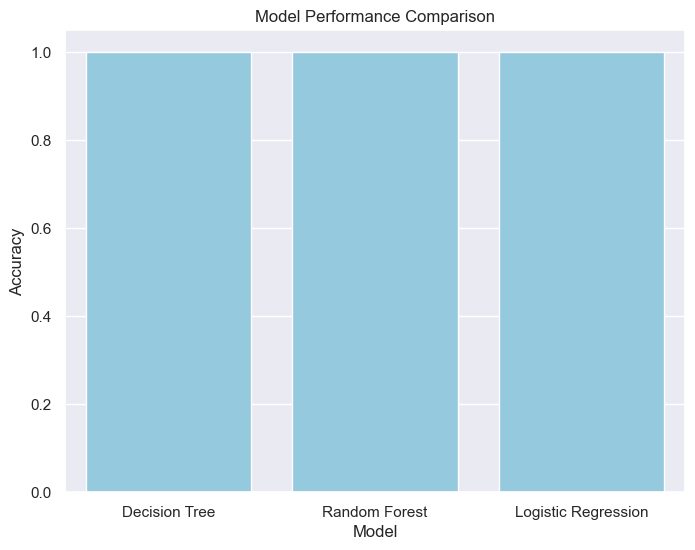

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


sns.set_theme()


data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)


y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")


train_sizes, train_scores, test_scores = learning_curve(
    best_clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Sample Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


feature_importances = best_clf.feature_importances_
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(x='Importance', y='Feature', hue='Feature', data=features_df, palette='viridis', dodge=False, legend=False)
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


models = {
    "Decision Tree": best_clf,
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Testing Accuracy: {accuracy:.2f}")


plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), color="skyblue")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()
